# Lending Club Case Study

Problem Statement

This assignment will give us an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

Objective:

The company wants to identify the driving factors which influences the loan applicants defaulting the loan so that the company can utilize this information for risk assement and cutting down the credit loss using EDA

# Import all the necessary libraries needed for the case study

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv file  and printing top 5 rows
loan = pd.read_csv('C:/shilpa/upgrad/loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Checking the shape of the dataframe
loan.shape

(39717, 111)

There is 39717 rows and 111 columns in the dataframe

# Data Cleansing


Finding rows with Null values

In [4]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#Finding percentage of Missing columns
percentage = round(loan.isnull().sum() * 100 /len(loan))
percentage

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [6]:
# Dropping all the columns which have only NA values 
null=39717
loan = loan.loc[:, (loan.isnull().sum() <null)]

In [7]:
loan.shape

(39717, 57)

In [8]:
#Removing all the variables which are not required at the time of loan application approval process.
variables=['application_type', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',                           
                                'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 
                                'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 
                                'total_rec_prncp']

In [9]:
loan.drop(variables, axis=1, inplace=True)

In [10]:
loan.shape

(39717, 36)

In [11]:
#Dropping other redundant columns
loan.drop(['member_id', 'emp_title', 'url', 'desc', 'title'], axis=1, inplace=True)

In [12]:
loan.shape

(39717, 31)

In [13]:
loan.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        25682
mths_since_last_record        36931
initial_list_status               0
next_pymnt_d                  38577
collections_12_mths_ex_med       56
policy_code                       0
acc_now_delinq                    0
chargeoff_within_12_mths    

In [14]:
# Dropping columns which have a lot of missing values
loan.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

In [15]:
loan.shape

(39717, 28)

In [16]:
#Checking for unique values
loan.nunique(axis=0)


id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
zip_code                        823
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                   

In [17]:
#There are columns with only one unique value which is not required for the analysis so dropping them
loan= loan.loc[:, (loan.nunique(axis=0) > 1)]

In [18]:
loan.shape

(39717, 20)

There are rows with loan_status= current.Since 'current' loan_status rows are of customers whose loan has already been approved so dropping them from analysis

In [19]:
loan= loan[loan['loan_status'] != 'Current']

In [20]:
loan.shape

(38577, 20)

After performing Data Cleansing there are 38577 rows and 20 columns

In [21]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
# Checking the data types of the columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [23]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [24]:
# Now the column int_rate has % sign so need to remove it and to change the datatype of it.

loan['int_rate'] = loan['int_rate'].apply(lambda x: x.replace('%', ''))
loan.int_rate = loan.int_rate.astype('float64')

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [26]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


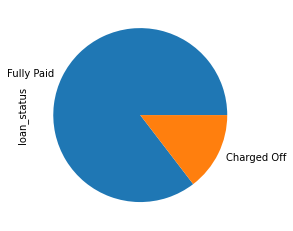

In [27]:
#Checking the counts of loan status
loan.loan_status.value_counts().plot.pie() 
plt.show()

From the above plot it is observed that most of the applicants have fully paid the loan

# Univariate Analysis

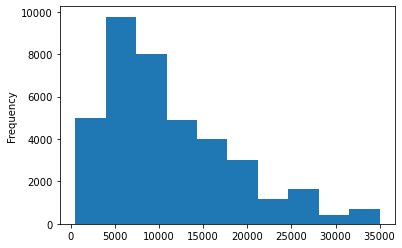

In [28]:
# 1.Univariate analysis of loan_amnt
loan.loan_amnt.plot.hist()
plt.show()

This histogram shows that  most of the applicants loan amount ranges between 5000 to 10000

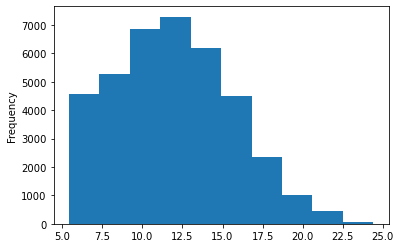

In [29]:
# 2.Univariate analysis of int_rate
loan.int_rate.plot.hist()
plt.show()

This histogram shows that most of the applicants interest rate is between 10% to 15%

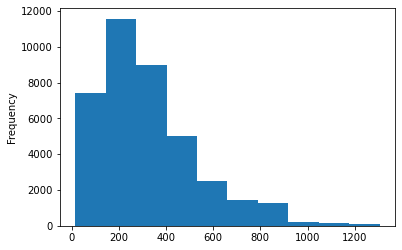

In [30]:
# 3.Univariate analysis of installment
loan.installment.plot.hist()
plt.show()

This histogram shows that for most of the applications monthly installment ranges between 200 and 400

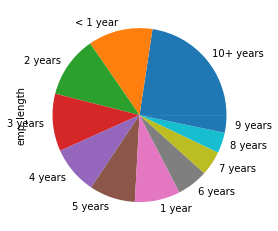

In [31]:
#4: Univariate analysis of Employment Length
loan.emp_length.value_counts().plot.pie() 
plt.show()

Most of the  applicants have 10+ years of experience

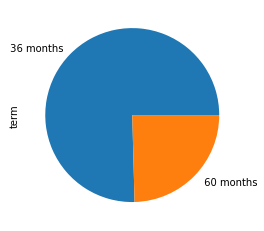

In [32]:
# 5. Univariate analysis of Term
loan.term.value_counts().plot.pie() 
plt.show()

According to the illustration most applicants prefer 36 months of term

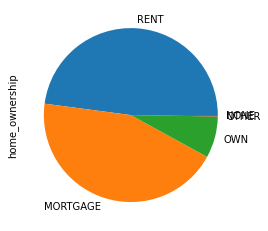

In [33]:
# 6. Univariate analysis of Home ownership
loan.home_ownership.value_counts().plot.pie() 
plt.show()

According to the Pie chart most of the applicants stay in Rented House

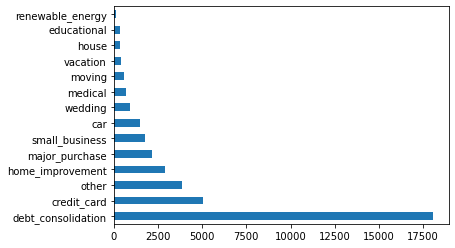

In [34]:
# 7. Univariate analysis of Purpose
loan.purpose.value_counts().plot.barh() 
plt.show()

Most of the applicants are taking loan for repayment of debt consolidation 

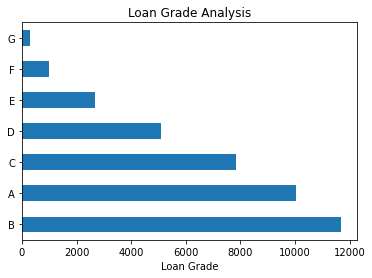

In [35]:
# 8: Univariate analysis of Grade
plt.title('Loan Grade Analysis')
plt.xlabel("Loan Grade")
loan.grade.value_counts().plot.barh()
plt.show()

Most of the applicants belong to B Grade

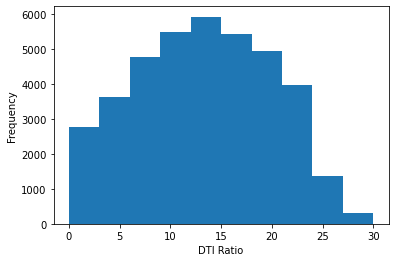

In [36]:
# 9: Univariate analysis of DTI
plt.xlabel("DTI Ratio")
loan.dti.plot.hist()
plt.show()

Most of the applicants DTI ratio is between 10 and 20

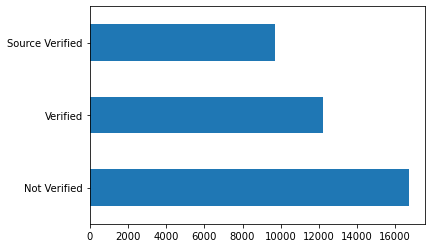

In [37]:
# 10. Univariate analysis Verification Status
loan.verification_status.value_counts().plot.barh() 
plt.show()

Most of the applicants status is Not Verified

# Segmented Univariate Analysis

In [38]:
# Deriving a new column with segments for the int_rate column 

loan['int_segments'] = pd.qcut(x=loan.int_rate, q=[0, 0.33, 0.66, 1], labels=["Low", "Medium", "High"])

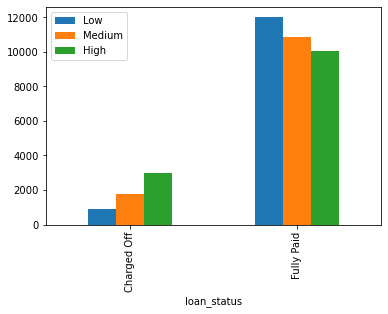

In [39]:
loan.groupby('loan_status')['int_segments'].value_counts().unstack().plot(kind='bar')
plt.show()

The applicants can become defaulters if the interest rate is higher.

# Bivariate Analysis

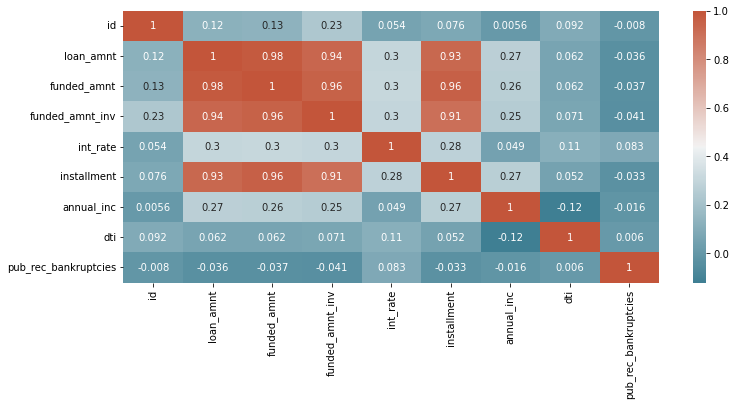

In [40]:
# Using the correlation matrix and plotting the heatmap 

corr = loan.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220,20, as_cmap=True))
plt.show()

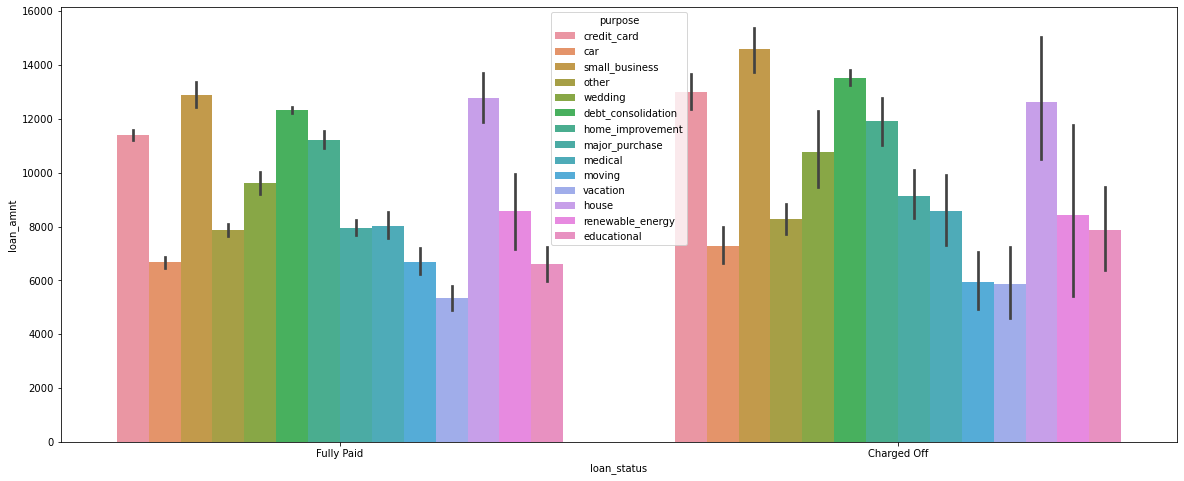

In [41]:
# Plotting graph between loan status,loan amount and purpose
plt.figure(figsize=[20,8])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='purpose')
plt.show()

This indicates that applicants take higher loan amount for Small business purpose

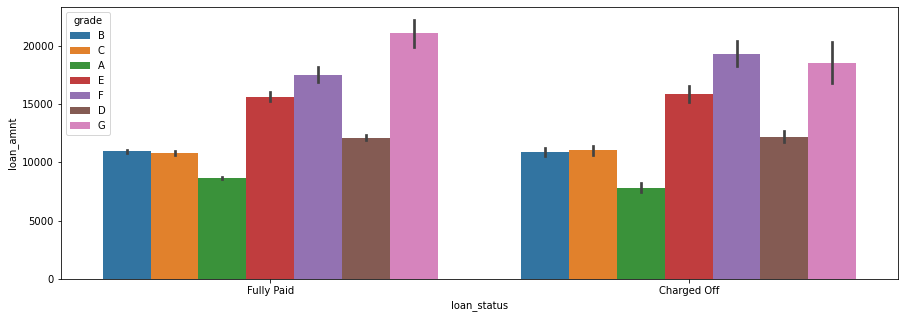

In [42]:
# Plotting graph between loan status,loan amount and grade
plt.figure(figsize=[15,5])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='grade')
plt.show()


Maximum Loan applicant from charged off group belong to grade "F" and their loan amount also high

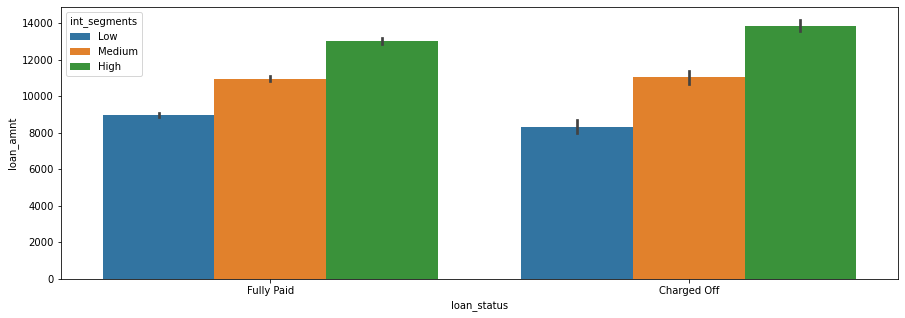

In [43]:
# Plotting graph between loan status,loan amount and interest
plt.figure(figsize=[15,5])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='int_segments')
plt.show()


Maximum Loan applicant from charged off group have high rate of interest and their loan amount also high

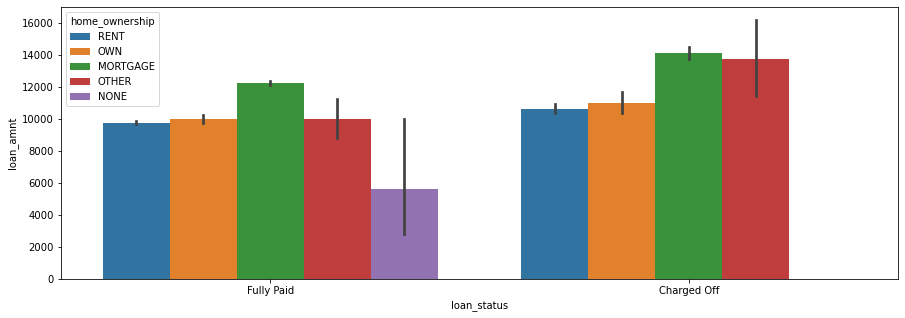

In [44]:
# Plotting graph between loan status,loan amount and home ownership
plt.figure(figsize=[15,5])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='home_ownership')
plt.show()


Maximum Loan applicant from charged off group have home ownership as mortage and their loan amount also high

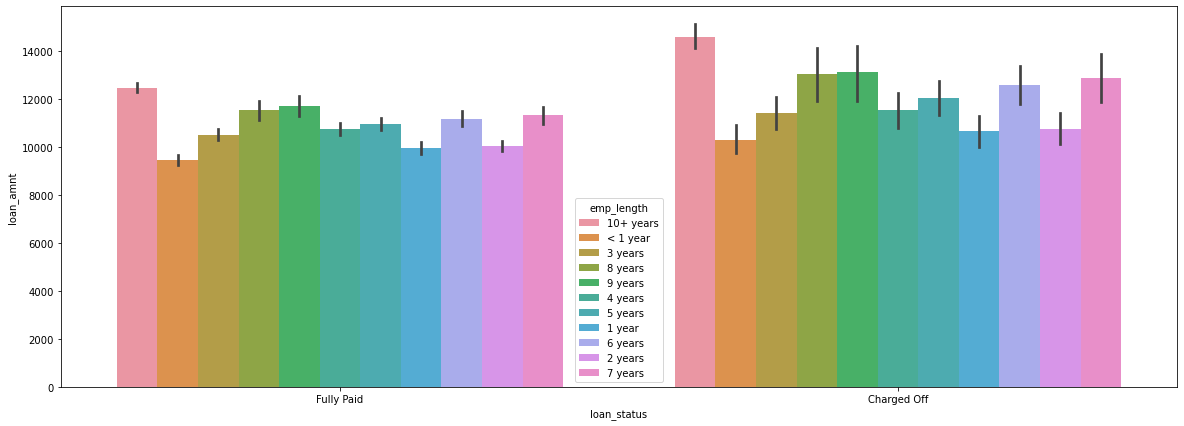

In [45]:
# Plotting graph between loan status,loan amount and employment length
plt.figure(figsize=[20,7])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='emp_length')
plt.show()

Maximum Loan applicant from charged off group have employment length 10+ years

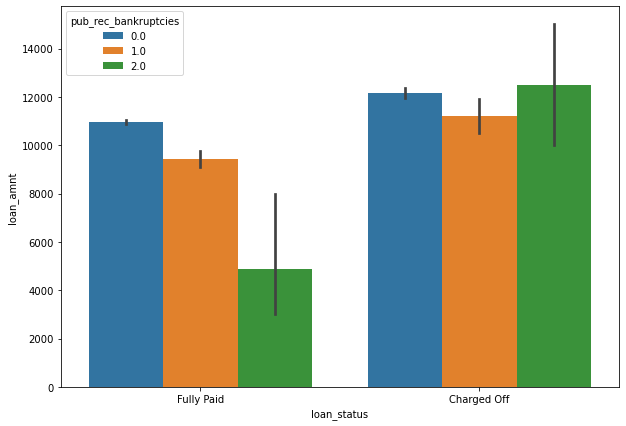

In [46]:
# Plotting graph between loan status,loan amount and bankruptcies
plt.figure(figsize=[10,7])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='pub_rec_bankruptcies')
plt.show()

Most applicants from charged off group have high loan and 2 bankruptcies records 

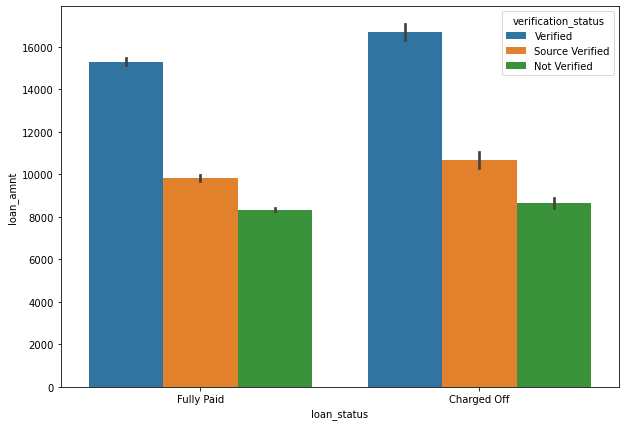

In [47]:
# Plotting graph between loan status,loan amount and verification status
plt.figure(figsize=[10,7])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='verification_status')
plt.show()

Most applicants from charged off group have high loan amount and their verification status id Verified

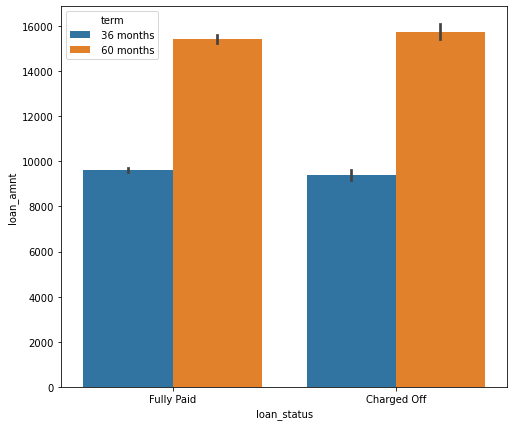

In [48]:
# Plotting graph between loan status,loan amount and loan term
plt.figure(figsize=[8,7])
sns.barplot(data=loan, x="loan_status", y="loan_amnt", hue='term')
plt.show()

Most applicants from charged off group have high loan amount and high term loan

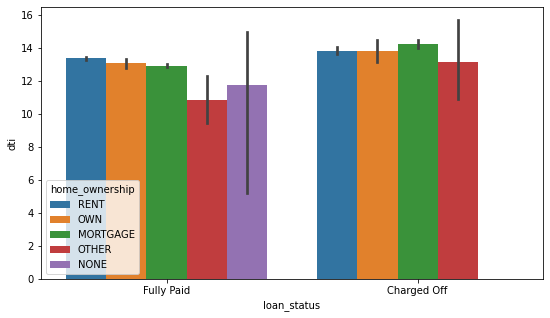

In [49]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[9,5])
sns.barplot(data=loan, x="loan_status", y="dti", hue='home_ownership')
plt.show()

Most applicants from charged off group have dti and home ownership as Mortgage

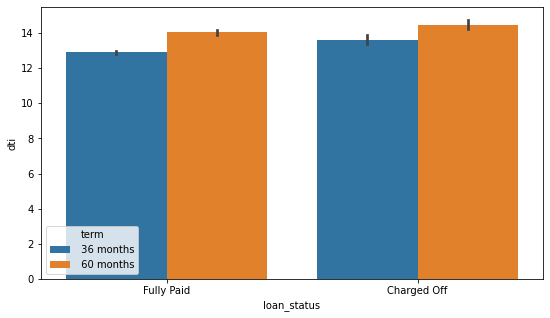

In [50]:
# Plotting the graph between Loan_Status, dti and term
plt.figure(figsize=[9,5])
sns.barplot(data=loan, x="loan_status", y="dti", hue='term')
plt.show()

There is no significant differentiation between dti and term of fully paid customers and Charged off customers

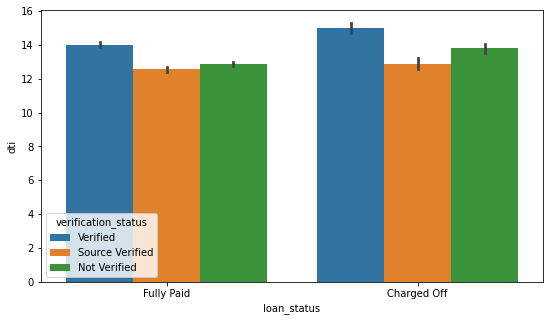

In [51]:
# Plotting the graph between Loan_Status, dti and verification status
plt.figure(figsize=[9,5])
sns.barplot(data=loan, x="loan_status", y="dti", hue='verification_status')
plt.show()


Most applicants from charged off group have dti and verification status as Verified